# Italy

## Basic Data (Import and Visualization)

### Start (Importing Libraries)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

### Read data and Plotting

In [11]:
df = pd.read_csv('/Users/abdul/Documents/Academics/Metnum/UTS/dataset/csv/italy.csv')
type(df)

pandas.core.frame.DataFrame

In [12]:
df.shape

(41, 5)

In [13]:
df.columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [14]:
df

,Confirmed,New,Deaths,Active
Date,,,,
2020-02-15,3,0,0,3
2020-02-16,3,0,0,3
2020-02-17,3,0,0,3
2020-02-18,3,0,0,3
2020-02-19,3,0,0,3
2020-02-20,4,1,0,4
2020-02-21,21,17,1,19
2020-02-22,79,58,2,75
2020-02-23,157,78,3,152


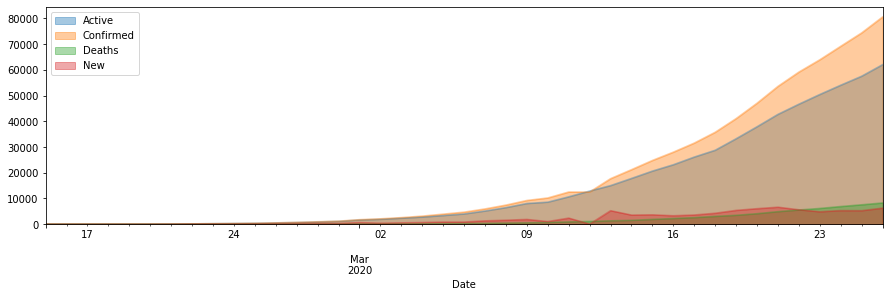

In [15]:
df.plot.area(y=["Active", "Confirmed", "Deaths", "New"], figsize=(15,4), alpha=0.4, subplots=False, stacked=False)
fig.autofmt_xdate()

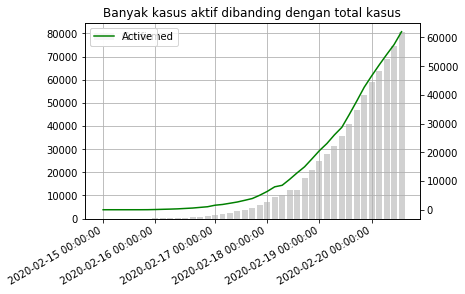

In [16]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["Confirmed"], color=(190/255,190/255,190/255,0.7), label='Confirmed')
ax2.plot(df.index, df["Active"], color='green', label='Active')
ax.set_xticklabels(df.index)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_title('Banyak kasus aktif dibanding dengan total kasus')
fig.autofmt_xdate()

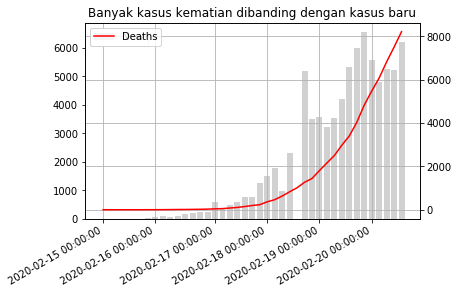

In [17]:
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.bar(df.index, df["New"], color=(190/255,190/255,190/255,0.7), label='New')
ax4.plot(df.index, df["Deaths"], color='red', label='Deaths')
ax3.set_xticklabels(df.index)
ax3.legend(loc='best')
ax4.legend(loc='best')
ax3.xaxis.grid(True)
ax4.yaxis.grid(True)
ax3.set_title('Banyak kasus kematian dibanding dengan kasus baru')
fig.autofmt_xdate()

## Regressions

### Active 

- Start: 15-Feb-2020
- End: 26-Mar-2020
- Range: 41 Days

**Data**

In [18]:
y = np.array ((3, 3, 3, 3, 3, 4, 19, 75, 152, 221, 310, 455, 593, 822, 1049, 1577, 1835, 2263, 2706, 3296, 3916, 5061, 6387, 7985, 8514, 10590, 12839, 14955, 17750, 20603, 23073, 26062, 28710, 33190, 37860, 42681, 46638, 50418, 54030, 57521, 62013))
y = y.astype('float64')
y

array([3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00,
       4.0000e+00, 1.9000e+01, 7.5000e+01, 1.5200e+02, 2.2100e+02,
       3.1000e+02, 4.5500e+02, 5.9300e+02, 8.2200e+02, 1.0490e+03,
       1.5770e+03, 1.8350e+03, 2.2630e+03, 2.7060e+03, 3.2960e+03,
       3.9160e+03, 5.0610e+03, 6.3870e+03, 7.9850e+03, 8.5140e+03,
       1.0590e+04, 1.2839e+04, 1.4955e+04, 1.7750e+04, 2.0603e+04,
       2.3073e+04, 2.6062e+04, 2.8710e+04, 3.3190e+04, 3.7860e+04,
       4.2681e+04, 4.6638e+04, 5.0418e+04, 5.4030e+04, 5.7521e+04,
       6.2013e+04])

In [19]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

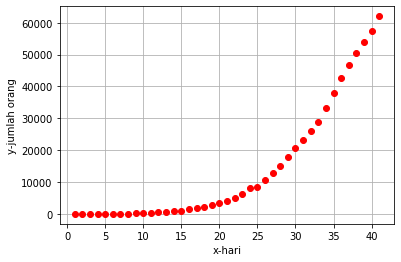

In [20]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [21]:
y = np.array ((3, 3, 3, 3, 3, 4, 19, 75, 152, 221, 310, 455, 593, 822, 1049, 1577, 1835, 2263, 2706, 3296, 3916, 5061, 6387, 7985, 8514, 10590, 12839, 14955, 17750, 20603, 23073, 26062, 28710, 33190, 37860, 42681, 46638, 50418, 54030, 57521, 62013))
y = y.astype('float64')
y

array([3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00,
       4.0000e+00, 1.9000e+01, 7.5000e+01, 1.5200e+02, 2.2100e+02,
       3.1000e+02, 4.5500e+02, 5.9300e+02, 8.2200e+02, 1.0490e+03,
       1.5770e+03, 1.8350e+03, 2.2630e+03, 2.7060e+03, 3.2960e+03,
       3.9160e+03, 5.0610e+03, 6.3870e+03, 7.9850e+03, 8.5140e+03,
       1.0590e+04, 1.2839e+04, 1.4955e+04, 1.7750e+04, 2.0603e+04,
       2.3073e+04, 2.6062e+04, 2.8710e+04, 3.3190e+04, 3.7860e+04,
       4.2681e+04, 4.6638e+04, 5.0418e+04, 5.4030e+04, 5.7521e+04,
       6.2013e+04])

In [22]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

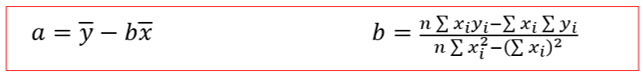

**Membuat xreg untuk plotting selanjutnya**

In [23]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

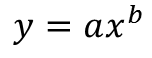

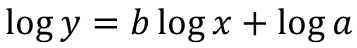

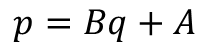

In [24]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [25]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [26]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 3.5971q -1.1323


**Kembalikan ke bentuk pangkat**

In [27]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.0737x^(3.5971)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [28]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9624 dan r^2 = 0.9262


**Plot**

In [29]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([7.37404792e-02, 1.03896372e-01, 1.42079148e-01, 1.89484542e-01,
       2.47369376e-01, 3.17049609e-01, 3.99898601e-01, 4.97345530e-01,
       6.10873957e-01, 7.42020517e-01, 8.92373702e-01, 1.06357275e+00,
       1.25730659e+00, 1.47531289e+00, 1.71937715e+00, 1.99133186e+00,
       2.29305565e+00, 2.62647262e+00, 2.99355155e+00, 3.39630527e+00,
       3.83679001e+00, 4.31710477e+00, 4.83939078e+00, 5.40583091e+00,
       6.01864914e+00, 6.68011009e+00, 7.39251848e+00, 8.15821872e+00,
       8.97959443e+00, 9.85906801e+00, 1.07991002e+01, 1.18021898e+01,
       1.28708731e+01, 1.40077236e+01, 1.52153518e+01, 1.64964045e+01,
       1.78535648e+01, 1.92895516e+01, 2.08071194e+01, 2.24090578e+01,
       2.40981914e+01, 2.58773794e+01, 2.77495154e+01, 2.97175270e+01,
       3.17843757e+01, 3.39530565e+01, 3.62265978e+01, 3.86080608e+01,
       4.11005399e+01, 4.37071618e+01, 4.64310856e+01, 4.92755027e+01,
       5.22436362e+01, 5.53387411e+01, 5.85641037e+01, 6.19230418e+01,
      

Text(0, 0.5, 'y-banyak orang')

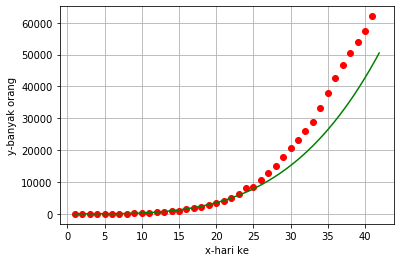

In [30]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

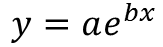

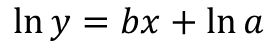

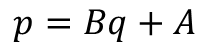

**Linearisasi**

In [31]:
y = np.array ((3, 3, 3, 3, 3, 4, 19, 75, 152, 221, 310, 455, 593, 822, 1049, 1577, 1835, 2263, 2706, 3296, 3916, 5061, 6387, 7985, 8514, 10590, 12839, 14955, 17750, 20603, 23073, 26062, 28710, 33190, 37860, 42681, 46638, 50418, 54030, 57521, 62013))
y = y.astype('float64')
y

array([3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00,
       4.0000e+00, 1.9000e+01, 7.5000e+01, 1.5200e+02, 2.2100e+02,
       3.1000e+02, 4.5500e+02, 5.9300e+02, 8.2200e+02, 1.0490e+03,
       1.5770e+03, 1.8350e+03, 2.2630e+03, 2.7060e+03, 3.2960e+03,
       3.9160e+03, 5.0610e+03, 6.3870e+03, 7.9850e+03, 8.5140e+03,
       1.0590e+04, 1.2839e+04, 1.4955e+04, 1.7750e+04, 2.0603e+04,
       2.3073e+04, 2.6062e+04, 2.8710e+04, 3.3190e+04, 3.7860e+04,
       4.2681e+04, 4.6638e+04, 5.0418e+04, 5.4030e+04, 5.7521e+04,
       6.2013e+04])

In [32]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

In [33]:
p = np.log(y)
q = x

**Hitung regresi linear**

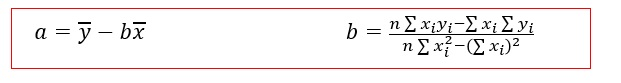

In [34]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [35]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.2585q + 1.9687


**Hitung kembali dalam bentuk bilangan berpangkat**

In [36]:
a = np.e**A
b = B

In [37]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 7.1614x^(0.2585)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [38]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9466 dan r^2 = 0.8961


**Plot data dan regresinya**

In [39]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [40]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([7.16136354e+00, 7.34891027e+00, 7.54136861e+00, 7.73886717e+00,
       7.94153797e+00, 8.14951645e+00, 8.36294161e+00, 8.58195610e+00,
       8.80670630e+00, 9.03734240e+00, 9.27401856e+00, 9.51689296e+00,
       9.76612793e+00, 1.00218900e+01, 1.02843502e+01, 1.05536839e+01,
       1.08300710e+01, 1.11136964e+01, 1.14047496e+01, 1.17034250e+01,
       1.20099224e+01, 1.23244465e+01, 1.26472077e+01, 1.29784215e+01,
       1.33183093e+01, 1.36670984e+01, 1.40250218e+01, 1.43923188e+01,
       1.47692347e+01, 1.51560217e+01, 1.55529380e+01, 1.59602491e+01,
       1.63782271e+01, 1.68071514e+01, 1.72473087e+01, 1.76989932e+01,
       1.81625066e+01, 1.86381589e+01, 1.91262679e+01, 1.96271598e+01,
       2.01411694e+01, 2.06686402e+01, 2.12099248e+01, 2.17653850e+01,
       2.23353919e+01, 2.29203266e+01, 2.35205799e+01, 2.41365531e+01,
       2.47686578e+01, 2.54173166e+01, 2.60829628e+01, 2.67660414e+01,
       2.74670090e+01, 2.81863340e+01, 2.89244972e+01, 2.96819919e+01,
      

Text(0, 0.5, 'y-banyak orang')

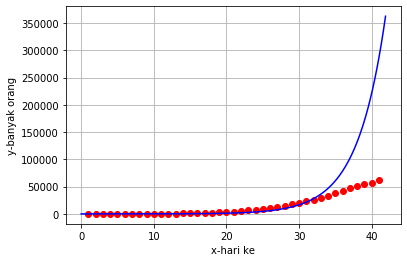

In [41]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [42]:
y = np.array ((3, 3, 3, 3, 3, 4, 19, 75, 152, 221, 310, 455, 593, 822, 1049, 1577, 1835, 2263, 2706, 3296, 3916, 5061, 6387, 7985, 8514, 10590, 12839, 14955, 17750, 20603, 23073, 26062, 28710, 33190, 37860, 42681, 46638, 50418, 54030, 57521, 62013))
y = y.astype('float64')
y

array([3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00,
       4.0000e+00, 1.9000e+01, 7.5000e+01, 1.5200e+02, 2.2100e+02,
       3.1000e+02, 4.5500e+02, 5.9300e+02, 8.2200e+02, 1.0490e+03,
       1.5770e+03, 1.8350e+03, 2.2630e+03, 2.7060e+03, 3.2960e+03,
       3.9160e+03, 5.0610e+03, 6.3870e+03, 7.9850e+03, 8.5140e+03,
       1.0590e+04, 1.2839e+04, 1.4955e+04, 1.7750e+04, 2.0603e+04,
       2.3073e+04, 2.6062e+04, 2.8710e+04, 3.3190e+04, 3.7860e+04,
       4.2681e+04, 4.6638e+04, 5.0418e+04, 5.4030e+04, 5.7521e+04,
       6.2013e+04])

In [43]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

**Membentuk regresi polinomial dari matriks**

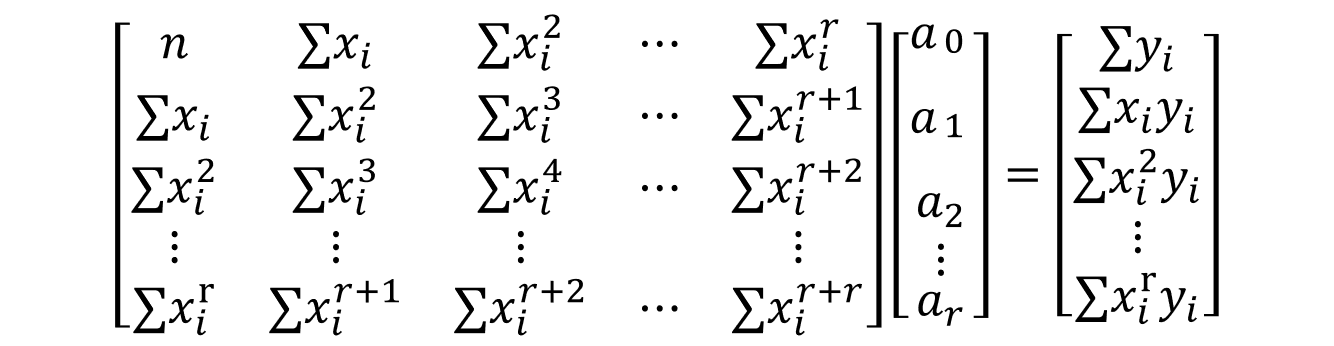

**Mendefinisikan elemen-elemen matriks kiri**

In [44]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[4.10000000e+01, 8.61000000e+02, 2.38210000e+04, 7.41321000e+05],
       [8.61000000e+02, 2.38210000e+04, 7.41321000e+05, 2.46070930e+07],
       [2.38210000e+04, 7.41321000e+05, 2.46070930e+07, 8.50789401e+08],
       [7.41321000e+05, 2.46070930e+07, 8.50789401e+08, 3.02550079e+10]])

**Mendefinisikan elemen-elemen matriks kanan**

In [45]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[5.86188000e+05],
       [2.02600250e+07],
       [7.19087439e+08],
       [2.60313061e+10]])

**Invers matriks sisi kiri**

In [46]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 4.71264935e-01, -8.50613871e-02,  4.09795596e-03,
        -5.76017906e-05],
       [-8.50613871e-02,  1.95585587e-02, -1.04382586e-03,
         1.55298092e-05],
       [ 4.09795596e-03, -1.04382586e-03,  5.90991836e-05,
        -9.13347631e-07],
       [-5.76017906e-05,  1.55298092e-05, -9.13347631e-07,
         1.44975814e-08]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [47]:
Y = Ainv.dot(B)
print(Y)

[[242.83578553]
 [ 54.0747843 ]
 [-23.91661721]
 [  1.48301624]]


In [48]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [49]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 1.4830x^3 + -23.9166X^2 + 54.0748x + 242.8358


In [50]:
y

array([3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00,
       4.0000e+00, 1.9000e+01, 7.5000e+01, 1.5200e+02, 2.2100e+02,
       3.1000e+02, 4.5500e+02, 5.9300e+02, 8.2200e+02, 1.0490e+03,
       1.5770e+03, 1.8350e+03, 2.2630e+03, 2.7060e+03, 3.2960e+03,
       3.9160e+03, 5.0610e+03, 6.3870e+03, 7.9850e+03, 8.5140e+03,
       1.0590e+04, 1.2839e+04, 1.4955e+04, 1.7750e+04, 2.0603e+04,
       2.3073e+04, 2.6062e+04, 2.8710e+04, 3.3190e+04, 3.7860e+04,
       4.2681e+04, 4.6638e+04, 5.0418e+04, 5.4030e+04, 5.7521e+04,
       6.2013e+04])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [51]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9990 dan r^2 = 0.8961


**Plot**

Text(0, 0.5, 'y')

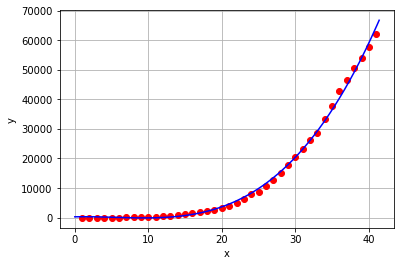

In [52]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

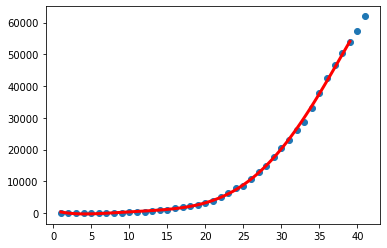

In [53]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, 41, 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [54]:
print (regpoly)

           5          4         3         2
-0.003966 x + 0.3796 x - 11.07 x + 142.9 x - 718.7 x + 948.7


In [55]:
print(r2_score(y, regpoly(x)))

0.9995515270217205


**Selesai**

### Total Death

- Start: 21-Feb-2020
- End: 26-Mar-2020
- Range: 35 Days

**Data**

In [56]:
y = np.array ((1, 2, 3, 7, 11, 12, 17, 21, 29, 41, 52, 79, 107, 148, 197, 233, 366, 463, 631, 827, 1016, 1266, 1441, 1809, 2158, 2503, 2978, 3405, 4032, 4825, 5476, 6077, 6820, 7503, 8215))
y = y.astype('float64')
y

array([1.000e+00, 2.000e+00, 3.000e+00, 7.000e+00, 1.100e+01, 1.200e+01,
       1.700e+01, 2.100e+01, 2.900e+01, 4.100e+01, 5.200e+01, 7.900e+01,
       1.070e+02, 1.480e+02, 1.970e+02, 2.330e+02, 3.660e+02, 4.630e+02,
       6.310e+02, 8.270e+02, 1.016e+03, 1.266e+03, 1.441e+03, 1.809e+03,
       2.158e+03, 2.503e+03, 2.978e+03, 3.405e+03, 4.032e+03, 4.825e+03,
       5.476e+03, 6.077e+03, 6.820e+03, 7.503e+03, 8.215e+03])

In [57]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

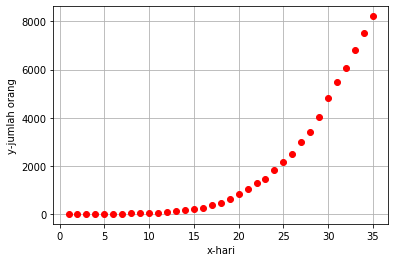

In [58]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [59]:
y = np.array ((1, 2, 3, 7, 11, 12, 17, 21, 29, 41, 52, 79, 107, 148, 197, 233, 366, 463, 631, 827, 1016, 1266, 1441, 1809, 2158, 2503, 2978, 3405, 4032, 4825, 5476, 6077, 6820, 7503, 8215))
y = y.astype('float64')
y

array([1.000e+00, 2.000e+00, 3.000e+00, 7.000e+00, 1.100e+01, 1.200e+01,
       1.700e+01, 2.100e+01, 2.900e+01, 4.100e+01, 5.200e+01, 7.900e+01,
       1.070e+02, 1.480e+02, 1.970e+02, 2.330e+02, 3.660e+02, 4.630e+02,
       6.310e+02, 8.270e+02, 1.016e+03, 1.266e+03, 1.441e+03, 1.809e+03,
       2.158e+03, 2.503e+03, 2.978e+03, 3.405e+03, 4.032e+03, 4.825e+03,
       5.476e+03, 6.077e+03, 6.820e+03, 7.503e+03, 8.215e+03])

In [60]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35.])

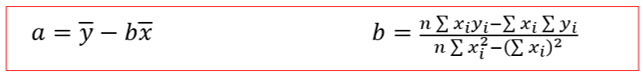

**Membuat xreg untuk plotting selanjutnya**

In [61]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

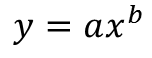

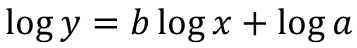

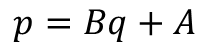

In [62]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [63]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [64]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 2.9685q -0.9512


**Kembalikan ke bentuk pangkat**

In [65]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.1119x^(2.9685)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [66]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9662 dan r^2 = 0.9336


**Plot**

In [67]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([1.11894528e-01, 1.48485717e-01, 1.92247865e-01, 2.43811518e-01,
       3.03805569e-01, 3.72857386e-01, 4.51592926e-01, 5.40636834e-01,
       6.40612526e-01, 7.52142264e-01, 8.75847220e-01, 1.01234754e+00,
       1.16226240e+00, 1.32621003e+00, 1.50480779e+00, 1.69867221e+00,
       1.90841898e+00, 2.13466303e+00, 2.37801855e+00, 2.63909901e+00,
       2.91851720e+00, 3.21688523e+00, 3.53481458e+00, 3.87291610e+00,
       4.23180004e+00, 4.61207609e+00, 5.01435334e+00, 5.43924036e+00,
       5.88734519e+00, 6.35927532e+00, 6.85563778e+00, 7.37703908e+00,
       7.92408526e+00, 8.49738191e+00, 9.09753415e+00, 9.72514666e+00,
       1.03808237e+01, 1.10651691e+01, 1.17787862e+01, 1.25222781e+01,
       1.32962474e+01, 1.41012964e+01, 1.49380268e+01, 1.58070401e+01,
       1.67089375e+01, 1.76443198e+01, 1.86137872e+01, 1.96179400e+01,
       2.06573778e+01, 2.17327000e+01, 2.28445057e+01, 2.39933936e+01,
       2.51799622e+01, 2.64048097e+01, 2.76685337e+01, 2.89717320e+01,
      

Text(0, 0.5, 'y-banyak orang')

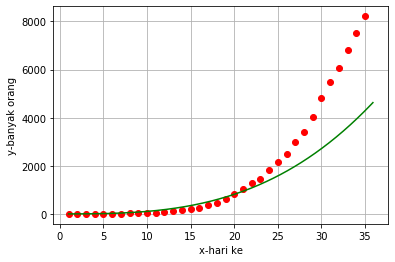

In [68]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

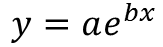

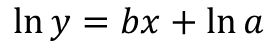

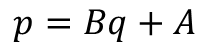

**Linearisasi**

In [69]:
y = np.array ((1, 2, 3, 7, 11, 12, 17, 21, 29, 41, 52, 79, 107, 148, 197, 233, 366, 463, 631, 827, 1016, 1266, 1441, 1809, 2158, 2503, 2978, 3405, 4032, 4825, 5476, 6077, 6820, 7503, 8215))
y = y.astype('float64')
y

array([1.000e+00, 2.000e+00, 3.000e+00, 7.000e+00, 1.100e+01, 1.200e+01,
       1.700e+01, 2.100e+01, 2.900e+01, 4.100e+01, 5.200e+01, 7.900e+01,
       1.070e+02, 1.480e+02, 1.970e+02, 2.330e+02, 3.660e+02, 4.630e+02,
       6.310e+02, 8.270e+02, 1.016e+03, 1.266e+03, 1.441e+03, 1.809e+03,
       2.158e+03, 2.503e+03, 2.978e+03, 3.405e+03, 4.032e+03, 4.825e+03,
       5.476e+03, 6.077e+03, 6.820e+03, 7.503e+03, 8.215e+03])

In [70]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35.])

In [71]:
p = np.log(y)
q = x

**Hitung regresi linear**

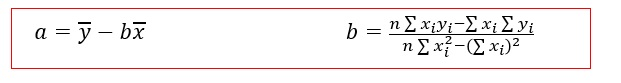

In [72]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [73]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.2544q + 1.0445


**Hitung kembali dalam bentuk bilangan berpangkat**

In [74]:
a = np.e**A
b = B

In [75]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 2.8420x^(0.2544)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [76]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9832 dan r^2 = 0.9667


**Plot data dan regresinya**

In [77]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [78]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([2.84196207e+00, 2.91520002e+00, 2.99032532e+00, 3.06738663e+00,
       3.14643381e+00, 3.22751806e+00, 3.31069187e+00, 3.39600909e+00,
       3.48352494e+00, 3.57329610e+00, 3.66538068e+00, 3.75983830e+00,
       3.85673011e+00, 3.95611884e+00, 4.05806884e+00, 4.16264612e+00,
       4.26991837e+00, 4.37995505e+00, 4.49282739e+00, 4.60860849e+00,
       4.72737328e+00, 4.84919867e+00, 4.97416352e+00, 5.10234874e+00,
       5.23383732e+00, 5.36871439e+00, 5.50706728e+00, 5.64898554e+00,
       5.79456106e+00, 5.94388810e+00, 6.09706333e+00, 6.25418591e+00,
       6.41535757e+00, 6.58068267e+00, 6.75026822e+00, 6.92422403e+00,
       7.10266271e+00, 7.28569980e+00, 7.47345379e+00, 7.66604624e+00,
       7.86360184e+00, 8.06624848e+00, 8.27411737e+00, 8.48734309e+00,
       8.70606368e+00, 8.93042074e+00, 9.16055953e+00, 9.39662904e+00,
       9.63878212e+00, 9.88717552e+00, 1.01419701e+01, 1.04033307e+01,
       1.06714267e+01, 1.09464316e+01, 1.12285234e+01, 1.15178848e+01,
      

Text(0, 0.5, 'y-banyak orang')

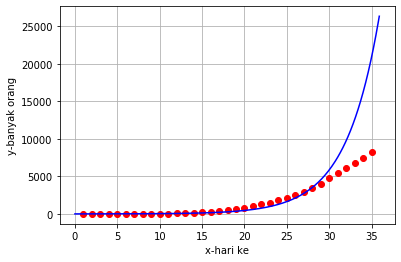

In [79]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [80]:
y = np.array ((1, 2, 3, 7, 11, 12, 17, 21, 29, 41, 52, 79, 107, 148, 197, 233, 366, 463, 631, 827, 1016, 1266, 1441, 1809, 2158, 2503, 2978, 3405, 4032, 4825, 5476, 6077, 6820, 7503, 8215))
y = y.astype('float64')
y

array([1.000e+00, 2.000e+00, 3.000e+00, 7.000e+00, 1.100e+01, 1.200e+01,
       1.700e+01, 2.100e+01, 2.900e+01, 4.100e+01, 5.200e+01, 7.900e+01,
       1.070e+02, 1.480e+02, 1.970e+02, 2.330e+02, 3.660e+02, 4.630e+02,
       6.310e+02, 8.270e+02, 1.016e+03, 1.266e+03, 1.441e+03, 1.809e+03,
       2.158e+03, 2.503e+03, 2.978e+03, 3.405e+03, 4.032e+03, 4.825e+03,
       5.476e+03, 6.077e+03, 6.820e+03, 7.503e+03, 8.215e+03])

In [81]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35.])

**Membentuk regresi polinomial dari matriks**

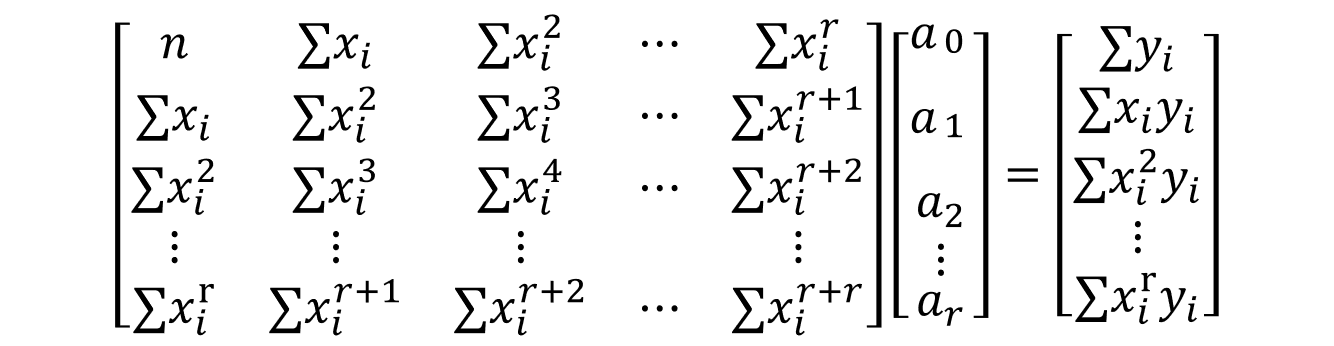

**Mendefinisikan elemen-elemen matriks kiri**

In [82]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[3.50000000e+01, 6.30000000e+02, 1.49100000e+04, 3.96900000e+05],
       [6.30000000e+02, 1.49100000e+04, 3.96900000e+05, 1.12689780e+07],
       [1.49100000e+04, 3.96900000e+05, 1.12689780e+07, 3.33263700e+08],
       [3.96900000e+05, 1.12689780e+07, 3.33263700e+08, 1.01367147e+10]])

**Mendefinisikan elemen-elemen matriks kanan**

In [83]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[6.27710000e+04],
       [1.86998400e+06],
       [5.71214420e+07],
       [1.77758009e+09]])

**Invers matriks sisi kiri**

In [84]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 5.70874714e-01, -1.20400433e-01,  6.77998472e-03,
        -1.11408200e-04],
       [-1.20400433e-01,  3.21160630e-02, -1.99848787e-03,
         3.47149147e-05],
       [ 6.77998472e-03, -1.99848787e-03,  1.31806246e-04,
        -2.37713086e-06],
       [-1.11408200e-04,  3.47149147e-05, -2.37713086e-06,
         4.40209419e-08]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [85]:
Y = Ainv.dot(B)
print(Y)

[[-67.00045837]
 [ 50.90062639]
 [ -8.13156717]
 [  0.38873844]]


In [86]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [87]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 0.3887x^3 + -8.1316X^2 + 50.9006x + -67.0005


In [88]:
y

array([1.000e+00, 2.000e+00, 3.000e+00, 7.000e+00, 1.100e+01, 1.200e+01,
       1.700e+01, 2.100e+01, 2.900e+01, 4.100e+01, 5.200e+01, 7.900e+01,
       1.070e+02, 1.480e+02, 1.970e+02, 2.330e+02, 3.660e+02, 4.630e+02,
       6.310e+02, 8.270e+02, 1.016e+03, 1.266e+03, 1.441e+03, 1.809e+03,
       2.158e+03, 2.503e+03, 2.978e+03, 3.405e+03, 4.032e+03, 4.825e+03,
       5.476e+03, 6.077e+03, 6.820e+03, 7.503e+03, 8.215e+03])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [89]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9996 dan r^2 = 0.9667


**Plot**

Text(0, 0.5, 'y')

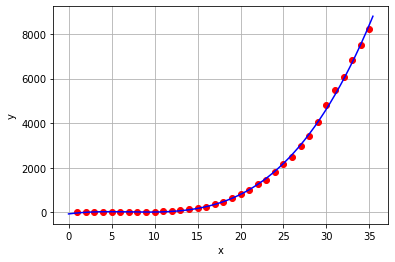

In [90]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

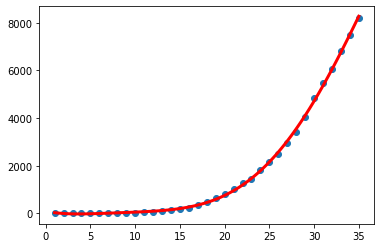

In [94]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, 35, 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [92]:
print (regpoly)

            5           4         3         2
-0.0007627 x + 0.06595 x - 1.631 x + 17.89 x - 78.02 x + 96.17


In [93]:
print(r2_score(y, regpoly(x)))

0.9995531494889952
